## 1. Face Landmarks Code

In [5]:
import dlib
import cv2
import numpy as np

# Vamos inicializar um detector de faces (HOG) para então
# let's go code an faces detector(HOG) and after detect the 
# landmarks on this detected face

# p = our pre-treined model directory, on my case, it's on the same script's diretory.
p = "../models/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

cap = cv2.VideoCapture(0)

def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((shape.num_parts, 2), dtype=dtype)

	# loop over all facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, shape.num_parts):
		coords[i] = (shape.part(i).x, shape.part(i).y)

	# return the list of (x, y)-coordinates
	return coords
 
while True:
    # Getting out image by webcam 
    _, image = cap.read()
    # Converting the image to gray scale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    # Get faces into webcam's image
    rects = detector(gray, 0)
    
    # For each detected face, find the landmark.
    for (i, rect) in enumerate(rects):
        # Make the prediction and transfom it to numpy array
        d = shape = predictor(gray, rect)
        shape = shape_to_np(shape)
    
        # Draw on our image, all the finded cordinate points (x,y) 
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
    
    # Show the image
    cv2.imshow("Output", image)
    
    # press Escape to close
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

## 2. Face Detection code 

In [3]:
# code for detecting face
import numpy as np
import dlib
from PIL import Image

# Take the image file name from the command line
file_name = "../images/naman.jpg"

# Create a HOG face detector using the built-in dlib class
face_detector = dlib.get_frontal_face_detector()

win = dlib.image_window()

# Load the image into an array
image = np.array(Image.open(file_name).convert("RGB"))

# Run the HOG face detector on the image data.
# The result will be the bounding boxes of the faces in our image.
detected_faces = face_detector(image, 1)

print("I found {} faces in the file {}".format(len(detected_faces), file_name))

# Open a window on the desktop showing the image
win.set_image(image)

# Loop through each face we found in the image
for i, face_rect in enumerate(detected_faces):

	# Detected faces are returned as an object with the coordinates 
	# of the top, left, right and bottom edges
	print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i, face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))

	# Draw a box around each face we found
	win.add_overlay(face_rect)

I found 1 faces in the file ../images/naman.jpg
- Face #0 found at Left: 142 Top: 167 Right: 365 Bottom: 390


I found 1 faces in the file ../images/Dr . C B. Rama Rao.jpg


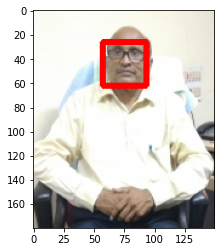

I found 1 faces in the file ../images/Dr. Adepu Kumar.jpg


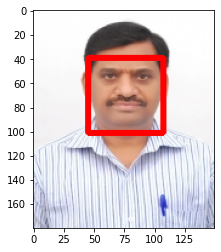

I found 1 faces in the file ../images/Dr. Ch. Sudhakar.jpg


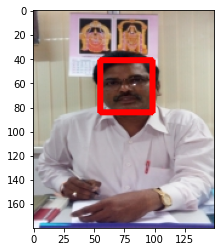

I found 1 faces in the file ../images/Dr. Chayan Bhar.jpg


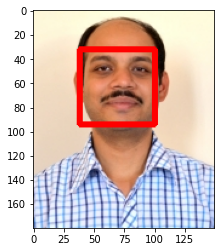

I found 1 faces in the file ../images/Dr. G. Amba Prasad Rao.jpg


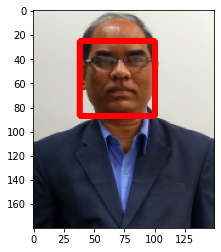

I found 1 faces in the file ../images/Dr. K.V. Kadambari.jpg


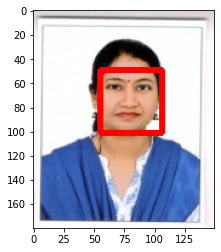

I found 1 faces in the file ../images/Dr. Krishnanand Lanka.jpg


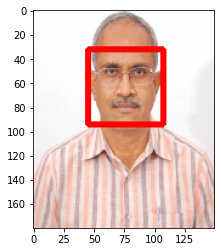

I found 1 faces in the file ../images/Dr. Madhu Murthy K.jpg


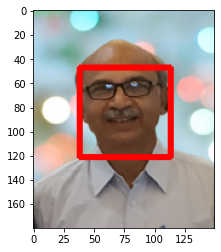

I found 1 faces in the file ../images/Dr. P. Sreehari Rao.jpg


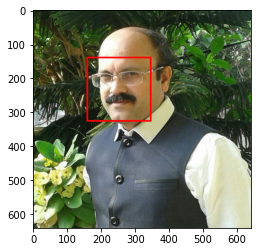

I found 1 faces in the file ../images/Dr. Ravi Kumar Jatoth.jpg


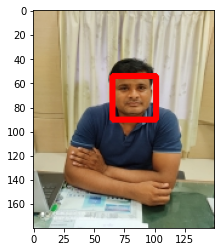

I found 1 faces in the file ../images/Dr. S. RAVI CHANDRA.jpg


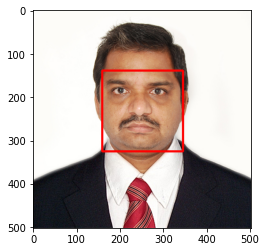

I found 1 faces in the file ../images/Dr. Sailaja Kumari M.jpg


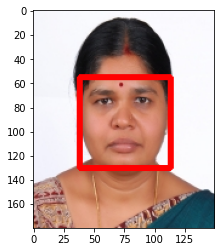

I found 1 faces in the file ../images/Dr. T. RAMAKRISHNUDU.jpg


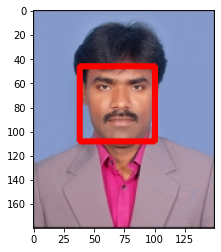

I found 1 faces in the file ../images/Gpr sharma sir.jpeg


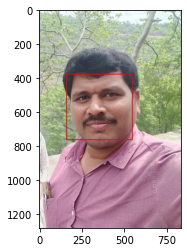

I found 1 faces in the file ../images/naman.jpeg


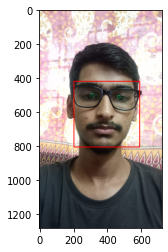

I found 1 faces in the file ../images/Prof. N.V. Ramana Rao.jpg


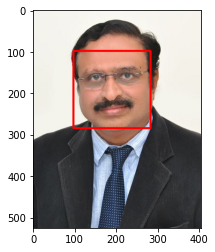

I found 1 faces in the file ../images/ravi kumar paulli.jpg


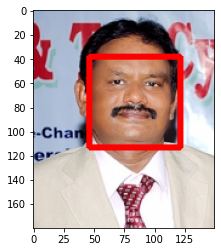

I found 1 faces in the file ../images/ravi sir.jpg


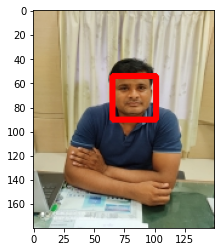

I found 1 faces in the file ../images/Shree S. Goverdhan Rao.jpg


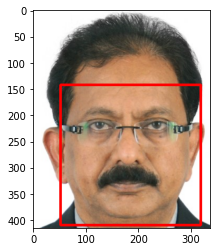

I found 1 faces in the file ../images/shudhansu.jpeg


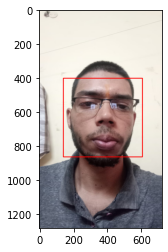

I found 1 faces in the file ../images/Sri. Gupta G R K.jpg


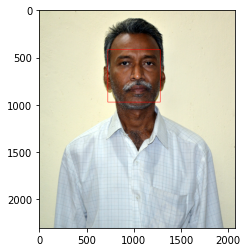

I found 1 faces in the file ../images/vivek.jpg


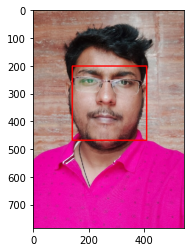

In [9]:
# code for detecting face
import numpy as np
import dlib
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os

# Create a HOG face detector using the built-in dlib class
face_detector = dlib.get_frontal_face_detector()


def detect(file_name):
    # Load the image into an array
    image = np.array(Image.open(file_name).convert("RGB"))

    # Run the HOG face detector on the image data.
    # The result will be the bounding boxes of the faces in our image.
    detected_faces = face_detector(image, 1)

    print("I found {} faces in the file {}".format(len(detected_faces), file_name))


    # Loop through each face we found in the image
    for i, face_rect in enumerate(detected_faces):
        cv2.rectangle(image, (face_rect.left(), face_rect.top()), 
		(face_rect.right(), face_rect.bottom()), (255, 0, 0), 3)
        plt.imshow(image)
        plt.show()

# detect("../images/naman.jpeg")

for file in os.listdir("../images"):
    detect("../images/"+file)